<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

The libraries used:

As an example, in this package we provide a ```csv``` file containing around 1000 xAPI statements.

In [ ]:
csv_file = '../example_statements.csv'

#### Load statements from file
Let's start by reading the csv file

In [ ]:
statements = pd.read_csv(csv_file, index_col=0, delimiter=',').reset_index(drop=True)
statements.head()

,timestamp,stored,actor,verb,object,result
0,2023-03-10 11:45:09.638000+00:00,2023-03-10T11:45:09.638Z,Teacher,Logged In,Salesianos,NaN
1,2023-03-10 11:52:00.020000+00:00,2023-03-10T11:52:00.020Z,PC006,Logged In,Salesianos,NaN
2,2023-03-10 11:52:04.063000+00:00,2023-03-10T11:52:04.063Z,PC008,Logged In,Salesianos,NaN
3,2023-03-10 11:52:05.177000+00:00,2023-03-10T11:52:05.177Z,Tablet1,Logged In,Salesianos,"{""score"":{""raw"":0}}"
4,2023-03-10 11:52:05.679000+00:00,2023-03-10T11:52:05.679Z,PC004,Logged In,Salesianos,NaN


The three most important columns are **actor**, **verb** and **object**, which create a sentence-like structure. We can see the actions that the app registers from the verb column.

In [1]:
#| echo: false
#| output: asis
show_doc(get_all_verbs)

---

[source](https://github.com/Stocastico/xapi_analysis/blob/main/xapi_analysis/input_csv.py#L17){target="_blank" style="float:right; font-size:smaller"}

### get_all_verbs

>      get_all_verbs (df:pandas.core.frame.DataFrame)

Returns a set with all verbs in the dataset

|    | **Type** | **Details** |
| -- | -------- | ----------- |
| df | DataFrame | The dataset containing the xAPI statements (one statement per row) |
| **Returns** | **typing.Set** | **Set containing all the verbs occurring in the dataset** |

In [ ]:
test_verbs = {'Logged In', 'Placed', 'Swiped', 'Asked', 'Started', 'Logged Out',
       'Accepted', 'Set Turn', 'Suggested', 'Ran Out', 'Sent', 'Checked',
       'Assigned', 'Canceled', 'Ended'}
test_eq(get_all_verbs(statements), test_verbs)

We provide similar functions for **actors** and **objects**

In [2]:
#| echo: false
#| output: asis
show_doc(get_all_actors)

---

[source](https://github.com/Stocastico/xapi_analysis/blob/main/xapi_analysis/input_csv.py#L25){target="_blank" style="float:right; font-size:smaller"}

### get_all_actors

>      get_all_actors (df:pandas.core.frame.DataFrame)

Returns a set with all actors in the dataset

|    | **Type** | **Details** |
| -- | -------- | ----------- |
| df | DataFrame | The dataset containing the xAPI statements (one statement per row) |
| **Returns** | **typing.Set** | **Set containing all the actors occurring in the dataset** |

In [ ]:
test_actors = {'Teacher', 'PC006', 'PC008', 'Tablet1', 'PC004', 'PC009', 'PC007', 'PC003', 'Iphone 1',
       'PC005', 'iPad2', 'Tablet 2', 'Android1', 'Android2', 'iPad1', 'PC002', 'Android4', 'Android3',
       'iphone 1', 'iPhone 1', 'Ipad1', 'Tablet1 ', 'Ipad2'}
test_eq(get_all_actors(statements), test_actors)

In [3]:
#| echo: false
#| output: asis
show_doc(get_all_objects)

---

[source](https://github.com/Stocastico/xapi_analysis/blob/main/xapi_analysis/input_csv.py#L33){target="_blank" style="float:right; font-size:smaller"}

### get_all_objects

>      get_all_objects (df:pandas.core.frame.DataFrame)

Returns a set with all objects in the dataset

|    | **Type** | **Details** |
| -- | -------- | ----------- |
| df | DataFrame | The dataset containing the xAPI statements (one statement per row) |
| **Returns** | **typing.Set** | **Set containing all the objects occurring in the dataset** |

The list of unique objects is quite big, so we will not print it in this example.

As the **actor** values are usually associated to a user input (for example the username provided when starting the app), it makes sense to clean the values as to avoid that *User1*, *user1* and *user 1* are trated as the same user. The following functions allow to do just that, on the desired columns.

In [4]:
#| echo: false
#| output: asis
show_doc(remove_whitespaces)

---

[source](https://github.com/Stocastico/xapi_analysis/blob/main/xapi_analysis/input_csv.py#L41){target="_blank" style="float:right; font-size:smaller"}

### remove_whitespaces

>      remove_whitespaces (df:pandas.core.frame.DataFrame, cols:List)

Removes whitespaces from the specified columns in the dataframe.

|    | **Type** | **Details** |
| -- | -------- | ----------- |
| df | DataFrame | The dataset containing the xAPI statements (one statement per row) |
| cols | typing.List | the columns on which whitespaces should be removed |
| **Returns** | **DataFrame** | **The dataframe after applying the function** |

In [5]:
#| echo: false
#| output: asis
show_doc(to_lowercase)

---

[source](https://github.com/Stocastico/xapi_analysis/blob/main/xapi_analysis/input_csv.py#L51){target="_blank" style="float:right; font-size:smaller"}

### to_lowercase

>      to_lowercase (df:pandas.core.frame.DataFrame, cols:List)

Converts to lowercase the elements in the specified columns.
The function only applies to columnns whose type is *str*

|    | **Type** | **Details** |
| -- | -------- | ----------- |
| df | DataFrame | The dataset containing the xAPI statements (one statement per row) |
| cols | typing.List | the columns whose content should be made lowercase |
| **Returns** | **DataFrame** | **The dataframe after applying the function** |

In [ ]:
test_actors = {'teacher', 'pc006', 'pc008', 'tablet1', 'pc004', 'pc009', 'pc007', 'pc003', 'iphone1',
               'pc005', 'ipad2', 'tablet2', 'android1', 'android2', 'ipad1', 'pc002', 'android4', 'android3'}
df = remove_whitespaces(statements, ["actor"])
df2 = to_lowercase(df, ["actor"])
test_eq(get_all_actors(df2), test_actors)

We may also be interested in removing specific rows from the dataset, for examples the ones associated to an **actor** that opted out of the intervention, or for **verbs** we do not care about. This could be the case for example for verbs like *Log In* or *Log out*, which provides information about when a user starts and stops the app, but may be not relevant in case our analysis is only about the interactions from within the app.

In [6]:
#| echo: false
#| output: asis
show_doc(remove_actors)

---

[source](https://github.com/Stocastico/xapi_analysis/blob/main/xapi_analysis/input_csv.py#L62){target="_blank" style="float:right; font-size:smaller"}

### remove_actors

>      remove_actors (df:pandas.core.frame.DataFrame, cols:List)

Removes from the dataframe all the rows whose actor is in the specified list

|    | **Type** | **Details** |
| -- | -------- | ----------- |
| df | DataFrame | The dataset containing the xAPI statements (one statement per row) |
| cols | typing.List | the list of actors to remove |
| **Returns** | **DataFrame** | **The dataframe with the specified actors removed** |

In [ ]:
statements = pd.read_csv(csv_file, index_col=0, delimiter=',').reset_index(drop=True)
test_actors = {'Teacher', 'PC006', 'PC008', 'Tablet1', 'PC004', 'PC009', 'PC007', 'PC003', 'Iphone 1',
       'PC005', 'iPad2', 'Tablet 2', 'Android1', 'Android2'}
test_df = remove_actors(statements, ['iPad1', 'PC002', 'Android4', 'Android3',
       'iphone 1', 'iPhone 1', 'Ipad1', 'Tablet1 ', 'Ipad2'])
test_eq(get_all_actors(test_df), test_actors)

In [7]:
#| echo: false
#| output: asis
show_doc(remove_verbs)

---

[source](https://github.com/Stocastico/xapi_analysis/blob/main/xapi_analysis/input_csv.py#L71){target="_blank" style="float:right; font-size:smaller"}

### remove_verbs

>      remove_verbs (df:pandas.core.frame.DataFrame, cols:List)

Removes from the dataframe all the rows whose actor is in the specified list

|    | **Type** | **Details** |
| -- | -------- | ----------- |
| df | DataFrame | The dataset containing the xAPI statements (one statement per row) |
| cols | typing.List | the list of verbs to remove |
| **Returns** | **DataFrame** | **The dataframe with the specified verbs removed** |

In [ ]:
test_verbs = {'Placed', 'Swiped', 'Asked', 'Started', 'Accepted', 'Set Turn', 'Suggested', 'Ran Out',
              'Sent', 'Checked', 'Assigned', 'Canceled', 'Ended'}
test_df = remove_verbs(statements, ["Logged In", "Logged Out"])
test_eq(get_all_verbs(test_df), test_verbs)

#### xAPI statements analysis
Here we present some functions that are typically applied when analysing xAPI statements data. For this, we will use a clean version of the statements dataset, where some of the functions described above has been applied

In [ ]:
statements = remove_whitespaces(statements, ["actor"])
statements = to_lowercase(statements, ["actor"])
statements = remove_verbs(statements, ["Logged In", "Logged Out"])
statements = remove_actors(statements, ["android3"])
statements.head(5)

,timestamp,stored,actor,verb,object,result
14,2023-03-10 11:52:18.277000+00:00,2023-03-10T11:52:18.277Z,iphone1,Placed,Earth,"{""score"":{""raw"":0}}"
15,2023-03-10 11:52:18.847000+00:00,2023-03-10T11:52:18.847Z,iphone1,Swiped,Left,"{""score"":{""raw"":0}}"
18,2023-03-10 11:52:29.001000+00:00,2023-03-10T11:52:29.001Z,iphone1,Placed,Earth,"{""score"":{""raw"":0}}"
19,2023-03-10 11:52:29.094000+00:00,2023-03-10T11:52:29.094Z,android2,Placed,Earth,"{""score"":{""raw"":0}}"
20,2023-03-10 11:52:29.194000+00:00,2023-03-10T11:52:29.194Z,iphone1,Swiped,Right,"{""score"":{""raw"":0}}"


A typical check is to evaluate how many interactions are provided by each actor:

In [8]:
#| echo: false
#| output: asis
show_doc(count_interactions)

---

[source](https://github.com/Stocastico/xapi_analysis/blob/main/xapi_analysis/input_csv.py#L80){target="_blank" style="float:right; font-size:smaller"}

### count_interactions

>      count_interactions (df:pandas.core.frame.DataFrame)

Creates a new dataframe counting the total number of statements associated to each actor

|    | **Type** | **Details** |
| -- | -------- | ----------- |
| df | DataFrame | The dataset containing the xAPI statements (one statement per row) |
| **Returns** | **DataFrame** | **A dataframe with the number of interactions of each actor** |

On our toy dataset, it looks like this:

In [ ]:
interactions =  count_interactions(statements)
interactions

,actor,count
0,pc009,6
1,pc006,13
2,pc008,19
3,pc002,21
4,pc004,32
5,pc007,42
6,pc003,43
7,iphone1,86
8,ipad1,87
9,android4,106


In [9]:
#| echo: false
#| output: asis
show_doc(create_barplot)

---

[source](https://github.com/Stocastico/xapi_analysis/blob/main/xapi_analysis/input_csv.py#L90){target="_blank" style="float:right; font-size:smaller"}

### create_barplot

>      create_barplot (df:pandas.core.frame.DataFrame, x:str, y:str,
>                      cmap:str='flare')

Creates an horizontal barplot of the data in the dataframe

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| df | DataFrame |  | The input dataset |
| x | str |  | the column with the numerical variable to be plotted |
| y | str |  | the column with the name associated to each value |
| cmap | str | flare | the color palette to be used |

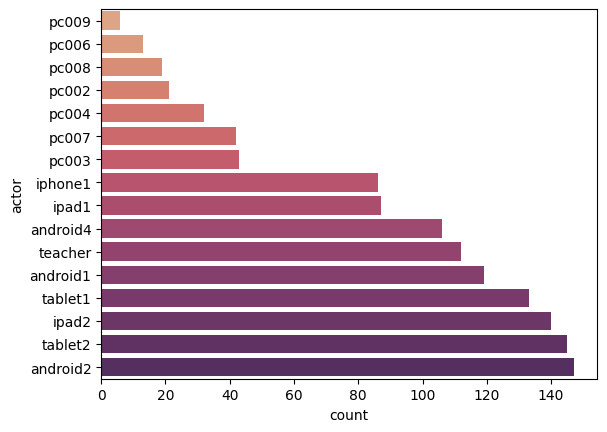

In [ ]:
create_barplot(interactions, 'count', 'actor')

We can also extract specific statements associated to just one **actor** and representing just one **verb**

In [10]:
#| echo: false
#| output: asis
show_doc(subset_actor_verb)

---

[source](https://github.com/Stocastico/xapi_analysis/blob/main/xapi_analysis/input_csv.py#L101){target="_blank" style="float:right; font-size:smaller"}

### subset_actor_verb

>      subset_actor_verb (df:pandas.core.frame.DataFrame, actor:str, verb:str)

Returns the subset of the original dataframe containing only statements with the specified actor and verb

|    | **Type** | **Details** |
| -- | -------- | ----------- |
| df | DataFrame | The dataset containing the xAPI statements (one statement per row) |
| actor | str | The actor we are interested in |
| verb | str | The verb we are interested in |
| **Returns** | **DataFrame** | **A dataframe containing only the statements with a specific actor and verb** |

In [ ]:
subset = subset_actor_verb(statements, "teacher", "Assigned")
subset.head(5)

,timestamp,stored,actor,verb,object,result
316,2023-03-10 12:04:36.832000+00:00,2023-03-10T12:04:36.832Z,teacher,Assigned,7.72;iPhone_1,NaN
368,2023-03-10 12:05:37.368000+00:00,2023-03-10T12:05:37.368Z,teacher,Assigned,8.15;Android2,NaN
397,2023-03-10 12:06:24.752000+00:00,2023-03-10T12:06:24.752Z,teacher,Assigned,7.72;Tablet1,NaN
541,2023-03-10 12:11:20.420000+00:00,2023-03-10T12:11:20.420Z,teacher,Assigned,7.45;Tablet_2,NaN
582,2023-03-10 12:12:12.001000+00:00,2023-03-10T12:12:12.001Z,teacher,Assigned,7.72;iPad2,NaN


From the subset we could analyse the **objects** to detect if there are any interesting patterns. In the example, we could extract the values (one is a score, the other the actor to whom it was assigned)

In [11]:
#| echo: false
#| output: asis
show_doc(split_column)

---

[source](https://github.com/Stocastico/xapi_analysis/blob/main/xapi_analysis/input_csv.py#L111){target="_blank" style="float:right; font-size:smaller"}

### split_column

>      split_column (df:pandas.core.frame.DataFrame, col:str, col_names:List,
>                    sep:str=';')

Splits the column of the DataFrame into multiple columns, and return a new data

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| df | DataFrame |  | The dataset containing the xAPI statements (one statement per row) |
| col | str |  | The column in the dataset that should be split into multiple columns |
| col_names | typing.List |  | The names of the columns created after split |
| sep | str | ; | The separator between fiels inside the column we want to split |
| **Returns** | **DataFrame** |  | **A dataframe with the content *col* cplit into several columns** |

In [ ]:
grades = split_column(subset, 'object', ['score', 'student'])
grades.head(5)

,score,student
316,7.72,iPhone_1
368,8.15,Android2
397,7.72,Tablet1
541,7.45,Tablet_2
582,7.72,iPad2


In [12]:
#| echo: false
#| output: asis
show_doc(average_interactions)

---

[source](https://github.com/Stocastico/xapi_analysis/blob/main/xapi_analysis/input_csv.py#L128){target="_blank" style="float:right; font-size:smaller"}

### average_interactions

>      average_interactions (df:pandas.core.frame.DataFrame, avg_col:str,
>                            user_col:str='actor')

Similar to [`count_interactions`](https://Stocastico.github.io/xapi_analysis/input_csv.html#count_interactions), but here creates a new dataframe averaging the statements
associated to a specific column

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| df | DataFrame |  | The dataset containing the xAPI statements (one statement per row) |
| avg_col | str |  | The column on which to compute average |
| user_col | str | actor | The column to groupby (usually **actor**) |
| **Returns** | **DataFrame** |  | **A new dataframe with the average of the interaction per specific value** |

In [ ]:
grades["score"] = grades["score"].astype("float")
avg_grades = average_interactions(grades, 'score', 'student')
avg_grades

,student,score
2,Android4,2.726667
4,Ipad2,3.000000
6,Tablet1_,4.000000
11,iphone_1,5.000000
10,iPhone_1,5.035000
0,Android1,6.125000
5,Tablet1,6.860000
1,Android2,7.380000
8,iPad1,7.500000
3,Ipad1,7.660000


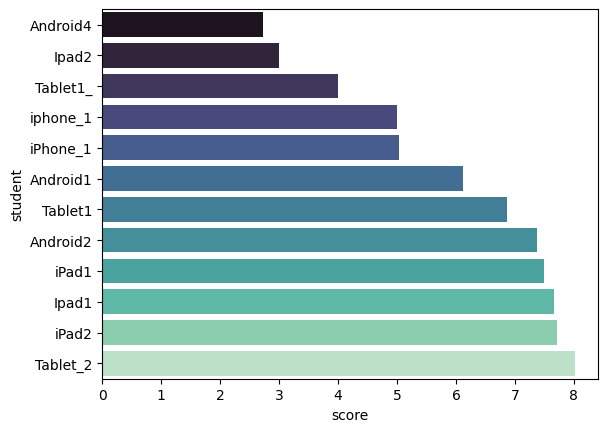

In [ ]:
create_barplot(avg_grades, 'score', 'student', cmap='mako')